![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


# Notebook: NLP & NLTK
#### Using Natural Language Processing in Python to do sentiment analysis on IMDB movie reviews

Author: Alexander Fred Ojala

Source: https://www.kaggle.com/c/word2vec-nlp-tutorial/data
https://github.com/rasbt/python-machine-learning-book/tree/master/code
https://github.com/justmarkham/pycon-2016-tutorial

*Code snippets given run on both Python 2.7 and Python 3.x


## Part 0: Pre-Setup

In [2]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division, absolute_import #make compatible with Python 2 and Python 3

# Data description

You can download the data (labeledTrainData.tsv.zip) here: https://www.kaggle.com/c/word2vec-nlp-tutorial/data, place it in your working directory & unzip the file.

## Data set

The labeled data set consists of 25,000 IMDB movie reviews. The sentiment of reviews is binary, meaning an IMDB rating < 5 results in a sentiment score of 0, and a rating >=7 have a sentiment score of 1 (no reviews with score 5 or 6 are included in the analysis). No individual movie has more than 30 reviews.

## File description

* **labeledTrainData** - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review. 

## Data columns
* **id** - Unique ID of each review
* **sentiment** - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* **review** - Text of the review


# Part 1: Explore the data

In [3]:
# Read in the data to a Pandas data frame
# Use header = 0 (first line contains col names)
# use delimiter=\t (columns are separated by tabs),
# use quoting=3 (Python will ignore doubled quotes)

import pandas as pd       
train = pd.read_csv("labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)
# train.shape should be (25000,3)

## Q1.1:
* 1: How many movie reviews are positive and how many are negative in labeledTrainData.tsv?


* 2: What is the average length of all the reviews (string length)?

# Q1:1 Solutions

(25000, 3)

1    12500
0    12500
Name: sentiment, dtype: int64


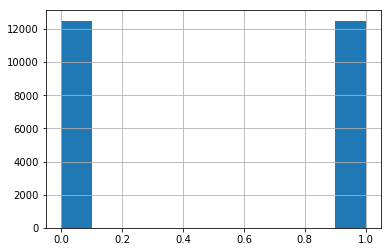

In [4]:
# 1. 
print(train.shape)
print()
print(train.sentiment.value_counts())

train.sentiment.hist()
plt.show()

In [5]:
# 2.
review_lengths = [len(review) for review in train.review.values]
avg_length = sum(review_lengths) / len(review_lengths)
print(avg_length)

# 1329.71056 Python 3
# 1329.95384 Python 2

1329.71056


## Q1:2 Explore NLP on one review

In Q1:2 you should work on the third review, i.e. `train['review'][2]`

First we would like to clean up the reviews. As you can see many interviews contain \ characters in front of quotation symobols, "`<br/>` tags, numbers, abbrevations etc.

* 1: Remove all the HTML tags in the third review, by creating a beatifulsoup object and then using the `.text` method. Save results in variable `review3`


* 2: Import NLTK's sent_tokenizer and count the number of sentences in review 3 (cleaned from HTML tags). To import sent_tokenizer use: `from nltk.tokenize import sent_tokenize`


* 3: Remove all punctuation, numbers and special characters from the third review (cleaned from HTML tags). We can do this using Regular Expression - package `re`. Code given to you as we haven't covered this in class. Save results in variable `review3`


* 4: Convert all the letters to lower case (save in variable `review3`). Then split the string so that every word is one element in a list (save the list in variable `review3_words`). Note: When we split the strings into words that process is called tokenization.


* 5: Use NLTK's PorterStemmer (`from nltk.stem import PorterStemmer`). Create a new Porter stemmer (`stemmer = PorterStemmer()`) and run it on every word in `review3_words`, print the results as one string (don't overwrite the `review3_words` variable from 4). What does the PorterStemmer do?


* 6: Now we want to Part Of Speech (POS)) tag the third movie review. We will use POS labeling also called grammatical tagging. To do this import `from nltk.tag import pos_tag`. When you use pos_tag on a word it returns a token-tag pair in the form of a tuple. In NLTK's Penn Treebank POS, the abbreviation (tag) for an adjective is JJ and NN for singular nouns. Count the number of singular nouns (NN) and adjectives (JJ) in `review3_words` using NLTK's pos_tag. A list of the Penn Treebank pos_tag's can be found here: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


* 7: An even more sophisticated operation than stemming using the PorterStemmer is called lemmatizing. Lemmatizing, in contrast to stemming, does not create non-existent words and converts words to their synonyms. In order to use lemmatizing we need to define the wordnet POS tag. A function that takes in a POS Penn Treebank tag and converts it to a wordnet tag and then lemmatizes words in a string has been given to you below. Please extend this code and print the lemmatized third movie review. Don't save the results in any variable.


* 8: Lastly we will try to remove common words that don't carry much information. These are called stopwords. In English they could for example be 'am', 'are', 'and' etc. To import NLTK's list of stopwords you need to download the stopword corpora (`import nltk` and then `nltk.download()` if you don't have it). When that is done run `from nltk.corpus import stopwords` and create a variable for English stopwords with `eng_stopwords = stopwords.words('english')`. Use the list of English stopwords to remove all the stopwords from your list of words in the third movie review, i.e. `review3_words`. Print `review3_words` without stopwords, count the number of stopwords removed and print them as well.

In [6]:
import bs4 as bs
import nltk
from nltk.tokenize import sent_tokenize
import re
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

eng_stopwords = stopwords.words('english')

# Q1:2 Solutions

In [7]:
review3 = train['review'][2] # the review used for initial analysis
print(review3[:1150])

"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security agent (Stacy Haiduk) and her mate (Brian Wimmer) fight hardly against the carnivorous Smilodons. The Sabretooths, themselves , of course, are the real star stars and they are astounding terrifyingly though not convincing. The giant animals savagely are stalking its prey and the group run afoul and fight against on

In [8]:
review3 = bs.BeautifulSoup(train['review'][2]).text # removes HTML tags
print(review3[:1150])

"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security agent (Stacy Haiduk) and her mate (Brian Wimmer) fight hardly against the carnivorous Smilodons. The Sabretooths, themselves , of course, are the real star stars and they are astounding terrifyingly though not convincing. The giant animals savagely are stalking its prey and the group run afoul and fight against on

In [9]:
print(len(sent_tokenize(review3))) # number of sentences

13


In [10]:
review3 = re.sub('[^a-zA-Z]',' ',review3)
print(review3[:200]) # remove special characters

 The film starts with a manager  Nicholas Bell  giving welcome investors  Robert Carradine  to Primal Park   A secret project mutating a primal animal using fossilized DNA  like  Jurassik Park   and s


In [11]:
review3 = review3.lower()
review3_words = review3.split()
print(review3_words[:10]) # tokenize and lower case

['the', 'film', 'starts', 'with', 'a', 'manager', 'nicholas', 'bell', 'giving', 'welcome']


In [12]:

ps = PorterStemmer()

ps_stems = []
for w in review3_words:
    ps_stems.append(ps.stem(w))

print(' '.join(ps_stems))
    
# PorterStemmer tries treating similar words as the same (e.g. give, gives, given = give)

the film start with a manag nichola bell give welcom investor robert carradin to primal park a secret project mutat a primal anim use fossil dna like jurassik park and some scientist resurrect one of natur s most fearsom predat the sabretooth tiger or smilodon scientif ambit turn deadli howev and when the high voltag fenc is open the creatur escap and begin savag stalk it prey the human visitor tourist and scientif meanwhil some youngster enter in the restrict area of the secur center and are attack by a pack of larg pre histor anim which are deadlier and bigger in addit a secur agent staci haiduk and her mate brian wimmer fight hardli against the carnivor smilodon the sabretooth themselv of cours are the real star star and they are astound terrifyingli though not convinc the giant anim savag are stalk it prey and the group run afoul and fight against one natur s most fearsom predat furthermor a third sabretooth more danger and slow stalk it victim the movi deliv the good with lot of b

In [13]:
token_tag = pos_tag(review3_words)

# count nouns (NN) and adjectives (JJ)
NN_count = 0
JJ_count = 0

for pair in token_tag:
    tag = pair[1]
    if tag == 'JJ':
        JJ_count+=1
    elif tag == 'NN':
        NN_count+=1
print('Number of nouns:', NN_count)
print('Number of adjectives:', JJ_count)

Number of nouns: 86
Number of adjectives: 47


In [14]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [15]:
from nltk.stem import WordNetLemmatizer


wnl = WordNetLemmatizer()

wnl_stems = []
for pair in token_tag:
    res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
    wnl_stems.append(res)

print(' '.join(wnl_stems))

the film start with a manager nicholas bell give welcome investor robert carradine to primal park a secret project mutate a primal animal use fossilized dna like jurassik park and some scientist resurrect one of nature s most fearsome predator the sabretooth tiger or smilodon scientific ambition turn deadly however and when the high voltage fence be open the creature escape and begin savagely stalk it prey the human visitor tourist and scientific meanwhile some youngster enter in the restricted area of the security center and be attack by a pack of large pre historical animal which be deadlier and big in addition a security agent stacy haiduk and her mate brian wimmer fight hardly against the carnivorous smilodons the sabretooths themselves of course be the real star star and they be astound terrifyingly though not convince the giant animal savagely be stalk it prey and the group run afoul and fight against one nature s most fearsome predator furthermore a third sabretooth more dangero

In [16]:
from nltk.corpus import stopwords

eng_stopwords = stopwords.words('english')

review3_wo_stopwords = [w for w in review3_words if not w in stopwords.words("english")]
removed_stopwords = [w for w in review3_words if w in stopwords.words("english")]

print(' '.join(review3_wo_stopwords))
print()
print('Stop words removed', removed_stopwords)
print()
print('NUMBER OF STOPWORDS REMOVED:',len(removed_stopwords))

film starts manager nicholas bell giving welcome investors robert carradine primal park secret project mutating primal animal using fossilized dna like jurassik park scientists resurrect one nature fearsome predators sabretooth tiger smilodon scientific ambition turns deadly however high voltage fence opened creature escape begins savagely stalking prey human visitors tourists scientific meanwhile youngsters enter restricted area security center attacked pack large pre historical animals deadlier bigger addition security agent stacy haiduk mate brian wimmer fight hardly carnivorous smilodons sabretooths course real star stars astounding terrifyingly though convincing giant animals savagely stalking prey group run afoul fight one nature fearsome predators furthermore third sabretooth dangerous slow stalks victims movie delivers goods lots blood gore beheading hair raising chills full scares sabretooths appear mediocre special effects story provides exciting stirring entertainment result

# Q1:3

* 1: Create a function called `review_cleaner` that reads in a review and
    - Removes HTML tags (using beautifulsoup)
    - Removes non-letters (using regular expression)
    - Converts all words to lowercase letters and tokenizes them (using .split() method on the review strings, so that every word in the review is an element in a list)
    - Removes all the English stopwords from the list of movie review words
    - Joins the words back into one string seperated by space

**NOTE: Transform the list of stopwords to a set before removing the stopwords. I.e. assign `eng_stopwords = set(stopwords.words("english"))`. Use the set to look up stopwords. This will speed up the computations A LOT (Python is much quicker when searching a set than a list).**
    
    
* 2: Create three lists: 
    - `review_clean_original`, `review_clean_ps` and `review_clean_wnl`. Where `review_clean_original` contains all the reviews from the train DataFrame, that have been cleaned by the function `review_cleaner` defined in 1.
    - `review_clean_ps` applies the PorterStemmer to the reviews in `review_clean_original`. **Note:** NLTK version 3.2.2 crashes when trying to use the PorterStemming on the string 'oed' (known bug). Therefore, use an if statement to skip just that specific string/word.
    - `review_clean_wnl` contains words that have been lemmatized using NLTK's WordNetLemmatizer on the words in the list `review_clean_original`.
    
**Note, problem 2: can take more than 10minutes to run on a laptop**

# Q1:3 Solutions

In [17]:
# 1. 
from nltk.corpus import stopwords

def review_cleaner(review):
    '''
    Clean and preprocess a review.
    
    1. Remove HTML tags
    2. Use regex to remove all special characters (only keep letters)
    3. Make strings to lower case and tokenize / word split reviews
    4. Remove English stopwords
    5. Rejoin to one string
    '''
    
    #1.
    review = bs.BeautifulSoup(review).text
    
    #2.
    review = re.sub("[^a-zA-Z]", " ",review)
    
    #3.
    review = review.lower().split()
    
    #4.
    eng_stopwords = set(stopwords.words("english"))
    review = [w for w in review if not w in eng_stopwords]
    
    #5.
    review = ' '.join(review)

    return(review)

In [18]:
%%time

num_reviews = len(train['review'])

review_clean_original = []

for i in range(0,num_reviews):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d reviews" %(i+1)) 
    review_clean_original.append(review_cleaner(train['review'][i]))

Done with 500 reviews
Done with 1000 reviews
Done with 1500 reviews
Done with 2000 reviews
Done with 2500 reviews
Done with 3000 reviews
Done with 3500 reviews
Done with 4000 reviews
Done with 4500 reviews
Done with 5000 reviews
Done with 5500 reviews
Done with 6000 reviews
Done with 6500 reviews
Done with 7000 reviews
Done with 7500 reviews
Done with 8000 reviews
Done with 8500 reviews
Done with 9000 reviews
Done with 9500 reviews
Done with 10000 reviews
Done with 10500 reviews
Done with 11000 reviews
Done with 11500 reviews
Done with 12000 reviews
Done with 12500 reviews
Done with 13000 reviews
Done with 13500 reviews
Done with 14000 reviews
Done with 14500 reviews
Done with 15000 reviews
Done with 15500 reviews
Done with 16000 reviews
Done with 16500 reviews
Done with 17000 reviews
Done with 17500 reviews
Done with 18000 reviews
Done with 18500 reviews
Done with 19000 reviews
Done with 19500 reviews
Done with 20000 reviews
Done with 20500 reviews
Done with 21000 reviews
Done with 21

In [19]:
%%time
# Porter stemmer

review_clean_ps = []

ps = PorterStemmer()


for i in range(0,num_reviews):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d reviews" %(i+1)) 
    ps_stems = []
    for w in review_clean_original[i].split():
        if w == 'oed':
            continue
        ps_stems.append(ps.stem(w))
    
    review_clean_ps.append(' '.join(ps_stems))

Done with 500 reviews
Done with 1000 reviews
Done with 1500 reviews
Done with 2000 reviews
Done with 2500 reviews
Done with 3000 reviews
Done with 3500 reviews
Done with 4000 reviews
Done with 4500 reviews
Done with 5000 reviews
Done with 5500 reviews
Done with 6000 reviews
Done with 6500 reviews
Done with 7000 reviews
Done with 7500 reviews
Done with 8000 reviews
Done with 8500 reviews
Done with 9000 reviews
Done with 9500 reviews
Done with 10000 reviews
Done with 10500 reviews
Done with 11000 reviews
Done with 11500 reviews
Done with 12000 reviews
Done with 12500 reviews
Done with 13000 reviews
Done with 13500 reviews
Done with 14000 reviews
Done with 14500 reviews
Done with 15000 reviews
Done with 15500 reviews
Done with 16000 reviews
Done with 16500 reviews
Done with 17000 reviews
Done with 17500 reviews
Done with 18000 reviews
Done with 18500 reviews
Done with 19000 reviews
Done with 19500 reviews
Done with 20000 reviews
Done with 20500 reviews
Done with 21000 reviews
Done with 21

In [20]:
%%time
# Lemmatizer

review_clean_wnl = []

wnl = WordNetLemmatizer()

for i in range(0,num_reviews):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d reviews" %(i+1)) 
    
    wnl_stems = []
    token_tag = pos_tag(review_clean_original[i].split())
    for pair in token_tag:
        res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
        wnl_stems.append(res)

    review_clean_wnl.append(' '.join(wnl_stems))

Done with 500 reviews
Done with 1000 reviews
Done with 1500 reviews
Done with 2000 reviews
Done with 2500 reviews
Done with 3000 reviews
Done with 3500 reviews
Done with 4000 reviews
Done with 4500 reviews
Done with 5000 reviews
Done with 5500 reviews
Done with 6000 reviews
Done with 6500 reviews
Done with 7000 reviews
Done with 7500 reviews
Done with 8000 reviews
Done with 8500 reviews
Done with 9000 reviews
Done with 9500 reviews
Done with 10000 reviews
Done with 10500 reviews
Done with 11000 reviews
Done with 11500 reviews
Done with 12000 reviews
Done with 12500 reviews
Done with 13000 reviews
Done with 13500 reviews
Done with 14000 reviews
Done with 14500 reviews
Done with 15000 reviews
Done with 15500 reviews
Done with 16000 reviews
Done with 16500 reviews
Done with 17000 reviews
Done with 17500 reviews
Done with 18000 reviews
Done with 18500 reviews
Done with 19000 reviews
Done with 19500 reviews
Done with 20000 reviews
Done with 20500 reviews
Done with 21000 reviews
Done with 21

# Q1:4: Feature vectors and Bag of Words model

### Explanation

Derived from source: https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

We will now use scikit-learn to create numeric representations of the words in the reviews, using a method called Bag of Words. You can see this as learning a vocabulary from all the reviews and counting how many times a word appears in the reviews. For example, if we have two sentences:

**Sentence 1:** "cool students study cool data science"

**Sentence 2:** "to know data science study data science"

The vocabulary of these two sentences can be summarized in a dictionary:

{ cool, students, study, data, science, to, know }

The bags of words count the number of times each word occur in a sentence. In Sentence 1, "cool" appears twice, and "students", "study", "data", and "science" appear once. The feature vector for Sentence 1 is:

Sentence 1: { 2, 1, 1, 1, 1, 0, 0 }

And for Sentence 2: { 0, 0, 1, 2, 2, 1, 1}

### Applying this strategy to the IMDB movie reviews

The movie review data contains a lot of words. To limit the analysis we use the 5000 most frequent words from the cleaned reviews. To extract the bag of words features we will use scitkit-learn.

The training data will be created by the `CountVectorizer` function from scikit-learn, and the training array will have 25000 rows (one for each review) and 5000 features (one for each vocabulary word).

CountVectorizer can automatically handle text cleaning, but here we specify "None", instead we did a step-by-step cleaning of the data in the earlier problems.

#### Random Forest for review sentiment classification

First split up the data set so that 80% are used as training samples (the first 20000 reviews and their sentiment) and 20% are used as validation samples (the last 5000 reviews and their sentiment). Use Random Forest to do numeric training on the features for the training samples from the Bag of Words and their respective sentiment labels for each review / feature vector. The number of trees is set to 50 as a default value.

## Problem

* 1: Run this analysis for the three cleaned review lists, i.e. `review_clean_original`, `review_clean_ps` and `review_clean_wnl`, by using the code below. Extend the function to print the **validation accuracy** by using `forest.predict(train_data_features[20000:,:])` and then comparing the resulting sentiment predictions with the ones stored in `train["sentiment"][20000:]`. **Note:** The printed validation accuracy should show the percentage of correctly predicted sentiments for the validation set.


* 2: Print the validation accuracy obtained for the three models. **Note:** Takes about 4mins to run.


* 3: What data preprocessing strategy worked the best? Why do you think that is? (Feel free to change the number of features extracted in the bag of words model and the number of trees in the random forest model, to see how it effects your accuracy).

# Q1:4 Solutions

In [21]:
%%time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def predict_sentiment(X,y=train["sentiment"]):
    
    
    print("Creating the bag of words model!\n")
    # CountVectorizer" is scikit-learn's bag of words tool.
    vectorizer = CountVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 max_features = 5000) 

    # Then we use fit_transform() to fit the model / learn the vocabulary,
    # then transform the data into feature vectors.
    # The input should be a list of strings. .toarraty() converts to a numpy array
    train_data_features = vectorizer.fit_transform(X).toarray()

    # You can extract the vocabulary created by CountVectorizer
    # by running print(vectorizer.get_feature_names())

    
    print("Training the random forest classifier!\n")
    # Initialize a Random Forest classifier with 50 trees
    forest = RandomForestClassifier(n_estimators = 50) 

    # Fit the forest to the training set, using the bag of words as 
    # features and the sentiment labels as the target variable
    forest = forest.fit(train_data_features[0:20000,:], y[0:20000] )
    
    
    valid_predictions = forest.predict(train_data_features[20000:,:])
    train_predictions = forest.predict(train_data_features[0:20000,:])
    train_acc = np.mean(train_predictions == y[0:20000])
    valid_acc = np.mean(valid_predictions == y[20000:])
    print("The training accuracy is: ", train_acc, "\n", "The validation accuracy is: ", valid_acc)
    print()
    
print('Original Reviews')
forest1 = predict_sentiment(review_clean_original)
print('Porter Stemmer')
forest2 = predict_sentiment(review_clean_ps)
print('Lemmatizing')
forest3 = predict_sentiment(review_clean_wnl)


# It  seems like Porter Stemmer and Lemmatizing does not effect the results as much as we thought
# This is just what Sebastian Raschka points out in his book Python Machine Learning:

'''
The Porter stemming algorithm is probably the oldest and simplest
stemming algorithm. Other popular stemming algorithms include the
newer Snowball stemmer (Porter2 or "English" stemmer) or the Lancaster
stemmer (Paice-Husk stemmer), which is faster but also more aggressive
than the Porter stemmer. Those alternative stemming algorithms are also
available through the NLTK package (http://www.nltk.org/api/
nltk.stem.html).

While stemming can create non-real words, such as thu, (from thus) as
shown in the previous example, a technique called lemmatization aims to
obtain the canonical (grammatically correct) forms of individual words—
the so-called lemmas. However, lemmatization is computationally more
diffcult and expensive compared to stemming and, in practice, it has
been observed that stemming and lemmatization have little impact on the
performance of text classifcation (Michal Toman, Roman Tesar, and Karel
Jezek. Infuence of word normalization on text classifcation. Proceedings of
InSciT, pages 354–358, 2006).
'''

Original Reviews
Creating the bag of words model!

Training the random forest classifier!

The training accuracy is:  0.9999 
 The validation accuracy is:  0.8328

Porter Stemmer
Creating the bag of words model!

Training the random forest classifier!

The training accuracy is:  1.0 
 The validation accuracy is:  0.8298

Lemmatizing
Creating the bag of words model!

Training the random forest classifier!

The training accuracy is:  1.0 
 The validation accuracy is:  0.8242

CPU times: user 2min 1s, sys: 3.47 s, total: 2min 4s
Wall time: 2min 8s


In [24]:
# If you want to submit to Kaggle
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print(test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_cleaner( test["review"][i] )
    clean_test_reviews.append( clean_review )



# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "BoW_results.csv", index=False, quoting=3 )

(25000, 2)
Cleaning and parsing the test set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



# Extra Credit (worth 1p)

* **Question:** Preprocess the reviews in any way you find suitable and build your own ML model that can predict the sentiment of movie reviews. Credit will be given if you can obtain a prediction accuracy of over 90%, when predicting the sentiments of the validation set (the last 5000 reviews). Train your model on the first 20000 reviews (with their sentiment as the target variable).

In [ ]:
## See other solution notebook ##